# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,f1_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold, cross_val_score,StratifiedKFold


# Load the dataset

In [2]:
data = pd.read_csv(r"C:\Users\VIPIN\Desktop\DSA_ICTAK\ASSIGNMENT\ASSIGNMENT.8\titanic_dataset .csv")

# Pre-processing steps :

# Shape of dataset

In [3]:
data.shape

(891, 12)

# First 5 rows

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Basic information of dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Columns in dataset

In [6]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Summary Statistics

In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data types of data

In [8]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Find missing values

In [9]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Fill missing value of 'Age' column

In [10]:
data['Age'] = data['Age'].fillna(data['Age'].median())
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Handle Categorical missing values

In [11]:
imputer = SimpleImputer(strategy = 'most_frequent')
data['Cabin'] = imputer.fit_transform(data[['Cabin']])
data['Embarked'] = imputer.fit_transform(data[['Embarked']])

In [12]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Column having unique values

In [13]:
data['PassengerId'].nunique()

891

# Drop the column

In [14]:
# 'PassengerId' having unique different values it doesnt convey any data, so we can drop that column.

data = data.drop(['PassengerId'], axis =1)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


# Label Encoding column

In [15]:
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,B96 B98,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,B96 B98,2


In [16]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked      int32
dtype: object

# Handle Categorical columns 

In [17]:
# 'Name', Ticket', & 'Cabin' having high number of unique values and since thus shows any information, so we can drop the columns

data[['Name','Ticket', 'Cabin']].nunique()

Name      891
Ticket    681
Cabin     147
dtype: int64

# Drop the columns

In [18]:
data = data.drop(['Name', 'Ticket', 'Cabin'], axis =1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


# Scaling on Features

In [19]:
scaler = StandardScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])

# Splitting the dataset into features (x) and target (y)

In [20]:
x = data.drop('Survived', axis=1)
y = data['Survived']

# Split data into training and testing sets

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

# KNN

In [22]:
metric = []
neighbors = np.arange(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric = 'minkowski', p=2)
    classifier.fit(x_train, y_train)
    pred_knn = classifier.predict(x_test)
    acc = accuracy_score(y_test, pred_knn)
    metric.append(acc)

# K value vs Accuracy

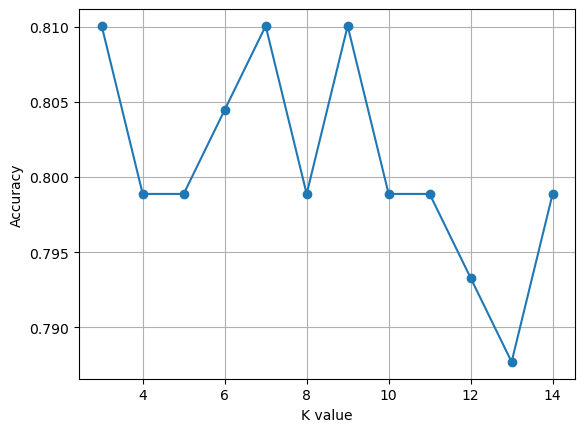

In [23]:
plt.plot(neighbors, metric, 'o-')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.grid()

# Make predictions

In [24]:
classifier = KNeighborsClassifier(n_neighbors= 9, metric = 'minkowski', p=2)
classifier.fit(x_train, y_train)
pred_knn = classifier.predict(x_test)

# Evaluate the performance

In [25]:
print('accuracy = ', accuracy_score(y_test, pred_knn))
print('precision = ', precision_score(y_test, pred_knn, average='macro'))
print('recall = ', recall_score(y_test, pred_knn, average='macro'))
print('f1 score = ', f1_score(y_test, pred_knn, average='macro'))

confusion_matrix(y_test,pred_knn)

accuracy =  0.8100558659217877
precision =  0.8069687334393216
recall =  0.7981981981981983
f1 score =  0.8015779864371413


array([[91, 14],
       [20, 54]], dtype=int64)

# SVM MODEL

In [26]:
svm = SVC(kernel='poly')
svm.fit(x_train, y_train)

SVC(kernel='poly')

In [27]:
y_pred = svm.predict(x_test)

# check the accuracy

In [28]:
print('accuracy = ', accuracy_score(y_test, y_pred))
print('precision = ', precision_score(y_test, y_pred))
print('recall = ', recall_score(y_test, y_pred))
print('f1 score = ', f1_score(y_test, y_pred))

confusion_matrix(y_test,y_pred)

accuracy =  0.8044692737430168
precision =  0.7468354430379747
recall =  0.7972972972972973
f1 score =  0.7712418300653594


array([[85, 20],
       [15, 59]], dtype=int64)

In [41]:
# Before cv, knn accuracy is 0.81 whereas svm accuracy is 0.80

# k fold cross validation - KNN

In [29]:
kfold_validator = KFold(10)

In [30]:
cv_result = cross_val_score(classifier, x, y, cv = kfold_validator)
cv_result

array([0.74444444, 0.78651685, 0.76404494, 0.78651685, 0.79775281,
       0.82022472, 0.80898876, 0.74157303, 0.85393258, 0.7752809 ])

In [31]:
np.mean(cv_result)

0.7879275905118603

# stratified cross validation - KNN

In [32]:
skfold_validator = StratifiedKFold(n_splits=10)

In [33]:
skcv_result = cross_val_score(classifier, x, y, cv = skfold_validator)
skcv_result

array([0.74444444, 0.79775281, 0.73033708, 0.79775281, 0.82022472,
       0.80898876, 0.83146067, 0.75280899, 0.80898876, 0.7752809 ])

In [34]:
np.mean(skcv_result)

0.7868039950062423

# k fold cross validation - SVM

In [35]:
kfold_validator = KFold(10)

In [36]:
cv_result = cross_val_score(svm, x, y, cv = kfold_validator)
cv_result

array([0.77777778, 0.83146067, 0.76404494, 0.84269663, 0.79775281,
       0.78651685, 0.80898876, 0.80898876, 0.87640449, 0.86516854])

In [37]:
np.mean(cv_result)

0.8159800249687891

# stratified cross validation - SVM

In [38]:
skfold_validator = StratifiedKFold(n_splits=10)

In [39]:
skcv_result = cross_val_score(svm, x, y, cv = skfold_validator)
skcv_result

array([0.78888889, 0.82022472, 0.74157303, 0.84269663, 0.80898876,
       0.79775281, 0.82022472, 0.82022472, 0.83146067, 0.86516854])

In [40]:
np.mean(skcv_result)

0.8137203495630463

In [ ]:
# Before cv, knn accuracy is 0.81 whereas svm accuracy is 0.804
# After k fold cv, knn accuracy is .788 whereas svm is 0.816
# After stratified cv, knn accuracy is .787 whereas svm is 0.814

# from the above result, kfold svm is having comparatively better accuracy.